In [36]:
# Importing necessary libraries
import pandas as pd               # for data handling
import numpy as np                # for numerical operations
import matplotlib.pyplot as plt   # for visualizations
import seaborn as sns             # for better looking plots

# For modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder


####1. Data Exploration:

In [2]:
# Load the training data
train_data = pd.read_csv("Titanic_train.csv")

In [3]:
# Load the test data
test_data = pd.read_csv("Titanic_test.csv")


In [4]:
# Let's take a look at the first few rows of the training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Shape of the dataset
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Train Data Shape: (891, 12)
Test Data Shape: (418, 11)


In [6]:
##EDA On train data

In [7]:
# Check for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Get summary statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check data types and general info
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
##Visual Exploratory Analysis

Text(0.5, 1.0, 'Survival Count')

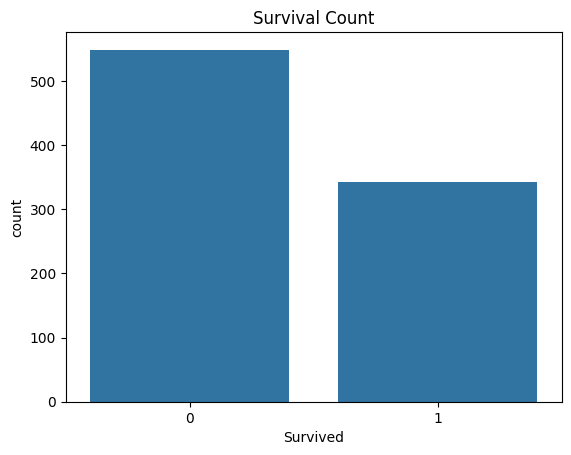

In [11]:
# Countplot of Survived
sns.countplot(x='Survived', data=train_data)
plt.title("Survival Count")

Text(0.5, 1.0, 'Survival by Gender')

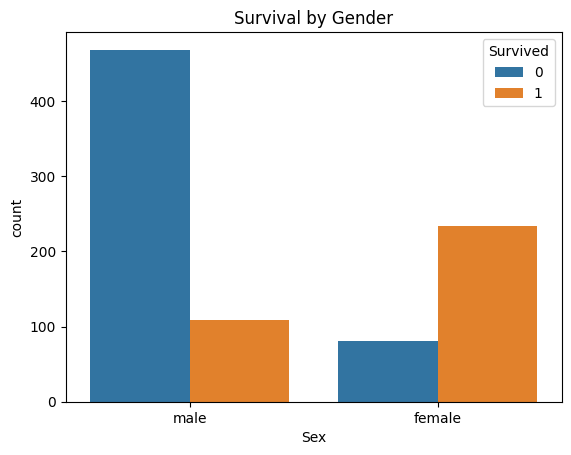

In [12]:
# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title("Survival by Gender")

Text(0.5, 1.0, 'Survival by Passenger Class')

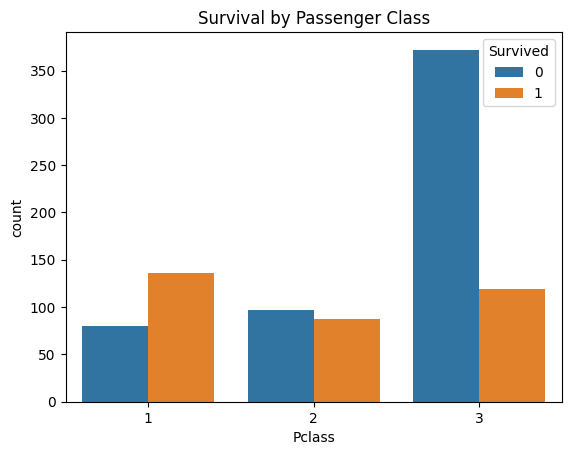

In [13]:
# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title("Survival by Passenger Class")

Text(0.5, 1.0, 'Age Distribution')

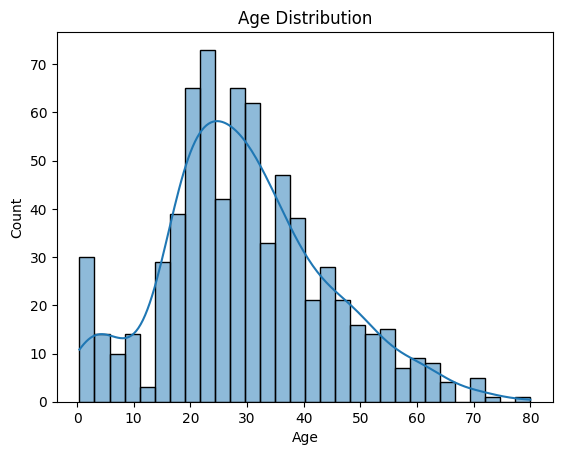

In [14]:
# Age distribution
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")

####2. Data Preprocessing:

In [15]:
# Fill missing 'Age' values with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Fill missing 'Embarked' with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])


# Fill missing 'Fare' in test data with median
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [16]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [17]:
# Drop irrelevant columns
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']

# Drop only if column exists
train_data = train_data.drop(columns=[col for col in cols_to_drop if col in train_data.columns])
test_data_passenger_ids = test_data['PassengerId']  # Save for submission
test_data = test_data.drop(columns=[col for col in cols_to_drop if col in test_data.columns])



In [18]:
# Convert categorical columns to numbers using Label Encoding
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

####3. Model Building:

In [19]:
# Features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# We use the entire training data for training (test data is separate)

In [20]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data)

In [28]:
# Split the data for evaluation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)# Initialize the model




In [29]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predict and evaluate
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

In [31]:
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8044692737430168


In [32]:
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [37]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

print("Cross-validation scores (accuracy):", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores (accuracy): [0.77094972 0.78651685 0.78089888 0.76404494 0.82022472]
Average cross-validation score: 0.7845270227857636


####4. Model Evaluation:

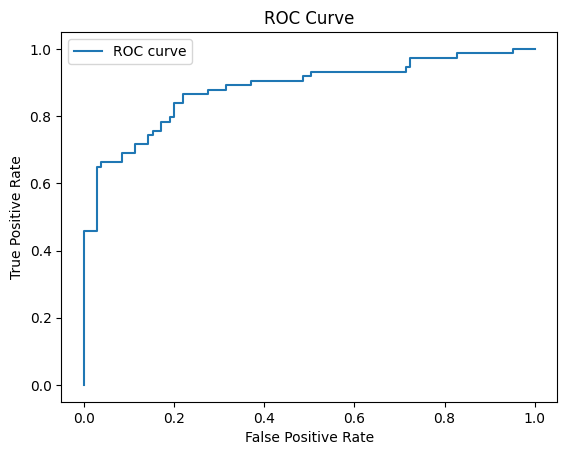

In [33]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [34]:
# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

ROC AUC Score: 0.8818532818532818


####5. Interpretation:

In [35]:
# Match each coefficient to the feature
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
5,Fare,0.121214
4,Parch,-0.100018
6,Embarked,-0.174770
3,SibSp,-0.328189
2,Age,-0.395757
0,Pclass,-0.792517
1,Sex,-1.285813


In [ ]:
#Passengers who were female, younger, in higher classes, and paid more for their tickets had a higher chance of survival.
#Sex had the strongest negative impact, while Fare had a small positive effect.

###Interview Questions:

####1.What is the difference between precision and recall?
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It shows how many selected items are relevant.

Recall is the ratio of correctly predicted positive observations to all actual positives. It shows how many relevant items are selected.

####2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique to evaluate a model’s performance by splitting the data into multiple parts, training the model on some parts, and testing it on others. This helps ensure the model generalizes well to new, unseen data.

It’s important in binary classification because it prevents overfitting and gives a more reliable estimate of how well the model will perform on real data.

####Conclusion

In [26]:
#Built a logistic regression model to predict Titanic survival outcomes.
# Data preprocessing (missing values, encoding) was essential for clean input.
#The model performed well, especially in identifying survivors.
#Females and 1st class passengers had significantly higher survival chances.
#Fare also showed a positive correlation with survival probability.
#Learned how to evaluate a classification model using accuracy, F1, and ROC-AUC.

#### Deployment with Streamlit

In [41]:
# Save the trained model to a file using pickle
import pickle

# Replace 'model' with your actual model variable name
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [45]:
from google.colab import files
files.download('logistic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [53]:
# Create app.py file
app_code = """
import streamlit as st
import pandas as pd
import pickle

# Load the saved model
with open('logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)

# App title
st.title("🚢 Titanic Survival Predictor")

st.write("Enter passenger details to check whether they would have survived.")

# User Inputs
pclass = st.selectbox("Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)", [1, 2, 3])
sex = st.radio("Sex", ['male', 'female'])
age = st.slider("Age", 0, 100, 30)
sibsp = st.number_input("Number of Siblings/Spouses aboard", min_value=0, value=0)
parch = st.number_input("Number of Parents/Children aboard", min_value=0, value=0)
fare = st.slider("Fare Paid", 0.0, 600.0, 50.0)

# Convert categorical input
sex_encoded = 1 if sex == 'male' else 0

# Create input DataFrame
input_df = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex_encoded],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare]
})

# Predict button
if st.button("Predict Survival"):
    prediction = model.predict(input_df)[0]
    if prediction == 1:
        st.success("✅ This passenger would have survived!")
    else:
        st.error("❌ This passenger would not have survived.")
"""

with open('app.py', 'w') as f:
    f.write(app_code)


In [54]:
from google.colab import files
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>